#  <u>***Motor Insurance Analysis.***</u>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time

---
---

## <u>***Importing data***</u>

In [2]:
df=pd.read_csv(r"C:\Users\Omar\Desktop\Omar_Files\Data_car_python\Data_set\dataCar.csv")
df.drop("X_OBSTAT_",axis=1,inplace=True)

In [3]:
df

,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat
0,1.06,0.303901,0,0,0.000000,HBACK,3,F,C,2
1,1.03,0.648871,0,0,0.000000,HBACK,2,F,A,4
2,3.26,0.569473,0,0,0.000000,UTE,2,F,E,2
3,4.14,0.317591,0,0,0.000000,STNWG,2,F,D,2
4,0.72,0.648871,0,0,0.000000,HBACK,4,F,C,2
...,...,...,...,...,...,...,...,...,...,...
67851,1.07,0.654346,0,0,0.000000,SEDAN,2,M,A,6
67852,1.23,0.908966,0,0,0.000000,SEDAN,4,M,C,3
67853,1.93,0.312115,0,0,0.000000,STNWG,4,M,C,3
67854,0.97,0.320329,1,1,7646.769989,HBACK,3,F,C,2


## <u>***Data shape***</u>

In [4]:
print(df.shape)
print("The data set has",df.shape[0],"rows, and",df.shape[1],"features")

(67856, 10)
The data set has 67856 rows, and 10 features


## <u>***Data types***</u>

In [5]:
df.dtypes

veh_value    float64
exposure     float64
clm            int64
numclaims      int64
claimcst0    float64
veh_body      object
veh_age        int64
gender        object
area          object
agecat         int64
dtype: object

## <u>***Data info***</u>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   veh_value  67856 non-null  float64
 1   exposure   67856 non-null  float64
 2   clm        67856 non-null  int64  
 3   numclaims  67856 non-null  int64  
 4   claimcst0  67856 non-null  float64
 5   veh_body   67856 non-null  object 
 6   veh_age    67856 non-null  int64  
 7   gender     67856 non-null  object 
 8   area       67856 non-null  object 
 9   agecat     67856 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 5.2+ MB


---
---

Data leakage (or leakage)<br>
Data leakage (or leakage) happens when your training data contains information about the target, but similar data will not be available when the model is used for prediction. This leads to high performance on the training set (and possibly even the validation data), but the model will perform poorly in production.

In other words, leakage causes a model to look accurate until you start making decisions with the model, and then the model becomes very inaccurate.

There are two main types of leakage: target leakage and train-test contamination.

---

* 1.Target leakage<br>

Target leakage occurs when your predictors include data that will not be available at the time you make predictions. It is important to think about target leakage in terms of the timing or chronological order that data becomes available, not merely whether a feature helps make good predictions.<br>

An example will be helpful. Imagine you want to predict who will get sick with pneumonia. The top few rows of your raw data look like this:<br>

got_pneumonia	age	weight	male	took_antibiotic_medicine	...<br>
False	65	100	False	False	...<br>
False	72	130	True	False	...<br>
True	58	100	False	True	...<br>


People take antibiotic medicines after getting pneumonia in order to recover. The raw data shows a strong relationship between those columns, but took_antibiotic_medicine is frequently changed after the value for got_pneumonia is determined. This is target leakage.<br>

The model would see that anyone who has a value of False for took_antibiotic_medicine didn't have pneumonia. Since validation data comes from the same source as training data, the pattern will repeat itself in validation, and the model will have great validation (or cross-validation) scores.
<br>
But the model will be very inaccurate when subsequently deployed in the real world, because even patients who will get pneumonia won't have received antibiotics yet when we need to make predictions about their future health.<br>

To prevent this type of data leakage, any variable updated (or created) after the target value is realized should be excluded

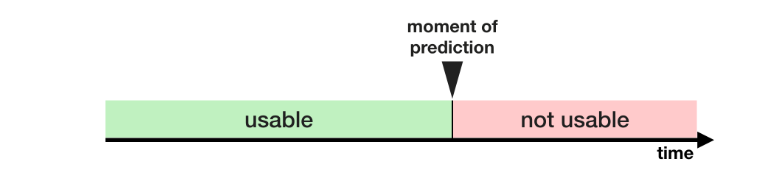

* 2.Train-Test Contamination<br>

A different type of leak occurs when you aren't careful to distinguish training data from validation data.

Recall that validation is meant to be a measure of how the model does on data that it hasn't considered before. You can corrupt this process in subtle ways if the validation data affects the preprocessing behavior. This is sometimes called train-test contamination.

For example, imagine you run preprocessing (like fitting an imputer for missing values) before calling train_test_split(). The end result? Your model may get good validation scores, giving you great confidence in it, but perform poorly when you deploy it to make decisions.

After all, you incorporated data from the validation or test data into how you make predictions, so the may do well on that particular data even if it can't generalize to new data. This problem becomes even more subtle (and more dangerous) when you do more complex feature engineering.

If your validation is based on a simple train-test split, exclude the validation data from any type of fitting, including the fitting of preprocessing steps. This is easier if you use scikit-learn pipelines. When using cross-validation, it's even more critical that you do your preprocessing inside the pipeline!

---